In [ ]:
# Name: Muhammad Junaid Iftikhar
# Roll Number: Ezi-ML-B1-161
# TASK 08 Traning Neural Network on MNIST Handwritten digit dataset


In [5]:
import kagglehub
animatronbot_mnist_digit_recognizer_path = kagglehub.dataset_download('animatronbot/mnist-digit-recognizer')
gustavoatt_mnist_original_path = kagglehub.dataset_download('gustavoatt/mnist-original')
oddrationale_mnist_in_csv_path = kagglehub.dataset_download('oddrationale/mnist-in-csv')
avnishnish_mnist_original_path = kagglehub.dataset_download('avnishnish/mnist-original')

print('Data source import complete.')
print(f"animatronbot_mnist_digit_recognizer_path: {animatronbot_mnist_digit_recognizer_path}")
print(f"gustavoatt_mnist_original_path: {gustavoatt_mnist_original_path}")
print(f"oddrationale_mnist_in_csv_path: {oddrationale_mnist_in_csv_path}")
print(f"avnishnish_mnist_original_path: {avnishnish_mnist_original_path}")

Using Colab cache for faster access to the 'mnist-digit-recognizer' dataset.
Using Colab cache for faster access to the 'mnist-original' dataset.
Using Colab cache for faster access to the 'mnist-in-csv' dataset.
Using Colab cache for faster access to the 'mnist-original' dataset.
Data source import complete.
animatronbot_mnist_digit_recognizer_path: /kaggle/input/mnist-digit-recognizer
gustavoatt_mnist_original_path: /kaggle/input/mnist-original
oddrationale_mnist_in_csv_path: /kaggle/input/mnist-in-csv
avnishnish_mnist_original_path: /kaggle/input/mnist-original


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# 1.Datasets preprocessing

* dataset 1

In [3]:
def load_data1(filepath):
    data = pd.read_csv(filepath)
    print(f"{len(data)} items.")
    labels = data['label'].values
    images = data.drop('label', axis=1).values
    images = images.reshape(-1, 1, 28, 28).astype('float32')
    return images, labels

In [6]:
x_1 , y_1 = load_data1('/kaggle/input/mnist-digit-recognizer/train.csv')
print(f"x_max {x_1.max()} x_min {x_1.min()} y_max {y_1.max()} y_min {y_1.min()}")

42000 items.
x_max 255.0 x_min 0.0 y_max 9 y_min 0


* dataset 2

In [7]:
def load_data2(filename, label_column):
    data = pd.read_csv(filename)
    print(f"{len(data)} items.")
    labels = data[label_column].values
    images = data.drop(label_column, axis=1).values
    images = images.reshape(-1, 1, 28, 28).astype('float32')
    return images, labels

In [8]:
x_2_train, y_2_train = load_data2('/kaggle/input/d/gustavoatt/mnist-original/mnist_train.csv', label_column='5')
x_2_test, y_2_test = load_data2('/kaggle/input/d/gustavoatt/mnist-original/mnist_test.csv', label_column='7')
x_2 = np.concatenate((x_2_train , x_2_test))
y_2 = np.concatenate((y_2_train, y_2_test))
print(f"x_max {x_2.max()} x_min {x_2.min()} y_max {y_2.max()} y_min {y_2.min()}")

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/d/gustavoatt/mnist-original/mnist_train.csv'

In [10]:
import os
print(os.listdir('/kaggle/input/mnist-original'))

['mnist-original.mat']


* dataset 3

In [11]:
def load_data3(filename):
    from scipy.io import loadmat
    mnist = loadmat(filename)
    mnist_data = mnist["data"].T
    mnist_label = mnist["label"][0].astype('int32')
    print(f"{len(mnist_label)} items.")
    mnist_data = mnist_data.reshape(-1, 1, 28, 28).astype('float32')
    return mnist_data, mnist_label

In [12]:
x_3, y_3 = load_data3("/kaggle/input/mnist-original/mnist-original.mat")
print(f"x_max {x_3.max()} x_min {x_3.min()} y_max {y_3.max()} y_min {y_3.min()}")

70000 items.
x_max 255.0 x_min 0.0 y_max 9 y_min 0


* dataset 4

In [13]:
def load_data4(filename):
    data = pd.read_csv(filename)
    print(f"{len(data)} items.")
    labels = data['label'].values
    images = data.drop('label', axis=1).values
    images = images.reshape(-1, 1, 28, 28).astype('float32')
    return images, labels

In [14]:
x_4_train, y_4_train = load_data4("/kaggle/input/mnist-in-csv/mnist_train.csv")
x_4_test, y_4_test = load_data4("/kaggle/input/mnist-in-csv/mnist_test.csv")
x_4 = np.concatenate((x_4_train, x_4_test))
y_4 = np.concatenate((y_4_train, y_4_test))
print(f"x_max {x_4.max()} x_min {x_4.min()} y_max {y_4.max()} y_min {y_4.min()}")

60000 items.
10000 items.
x_max 255.0 x_min 0.0 y_max 9 y_min 0


* visualsize

In [16]:
def show_examples(x, y):
    plt.figure(figsize=(15,15))
    l = min(25, x.shape[0])
    is_normalized = x.min() < 0 or x.max() > 1
    for i in range(l):
        plt.subplot(5,5,i+1)
        if is_normalized:
            denormalized_image = (x[i] * 0.5) + 0.5
        else:
            denormalized_image = x[i]
        plt.imshow(denormalized_image.reshape(28,28), cmap='gray')
        plt.title(f"Label:{y[i] if l > 1 else y}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

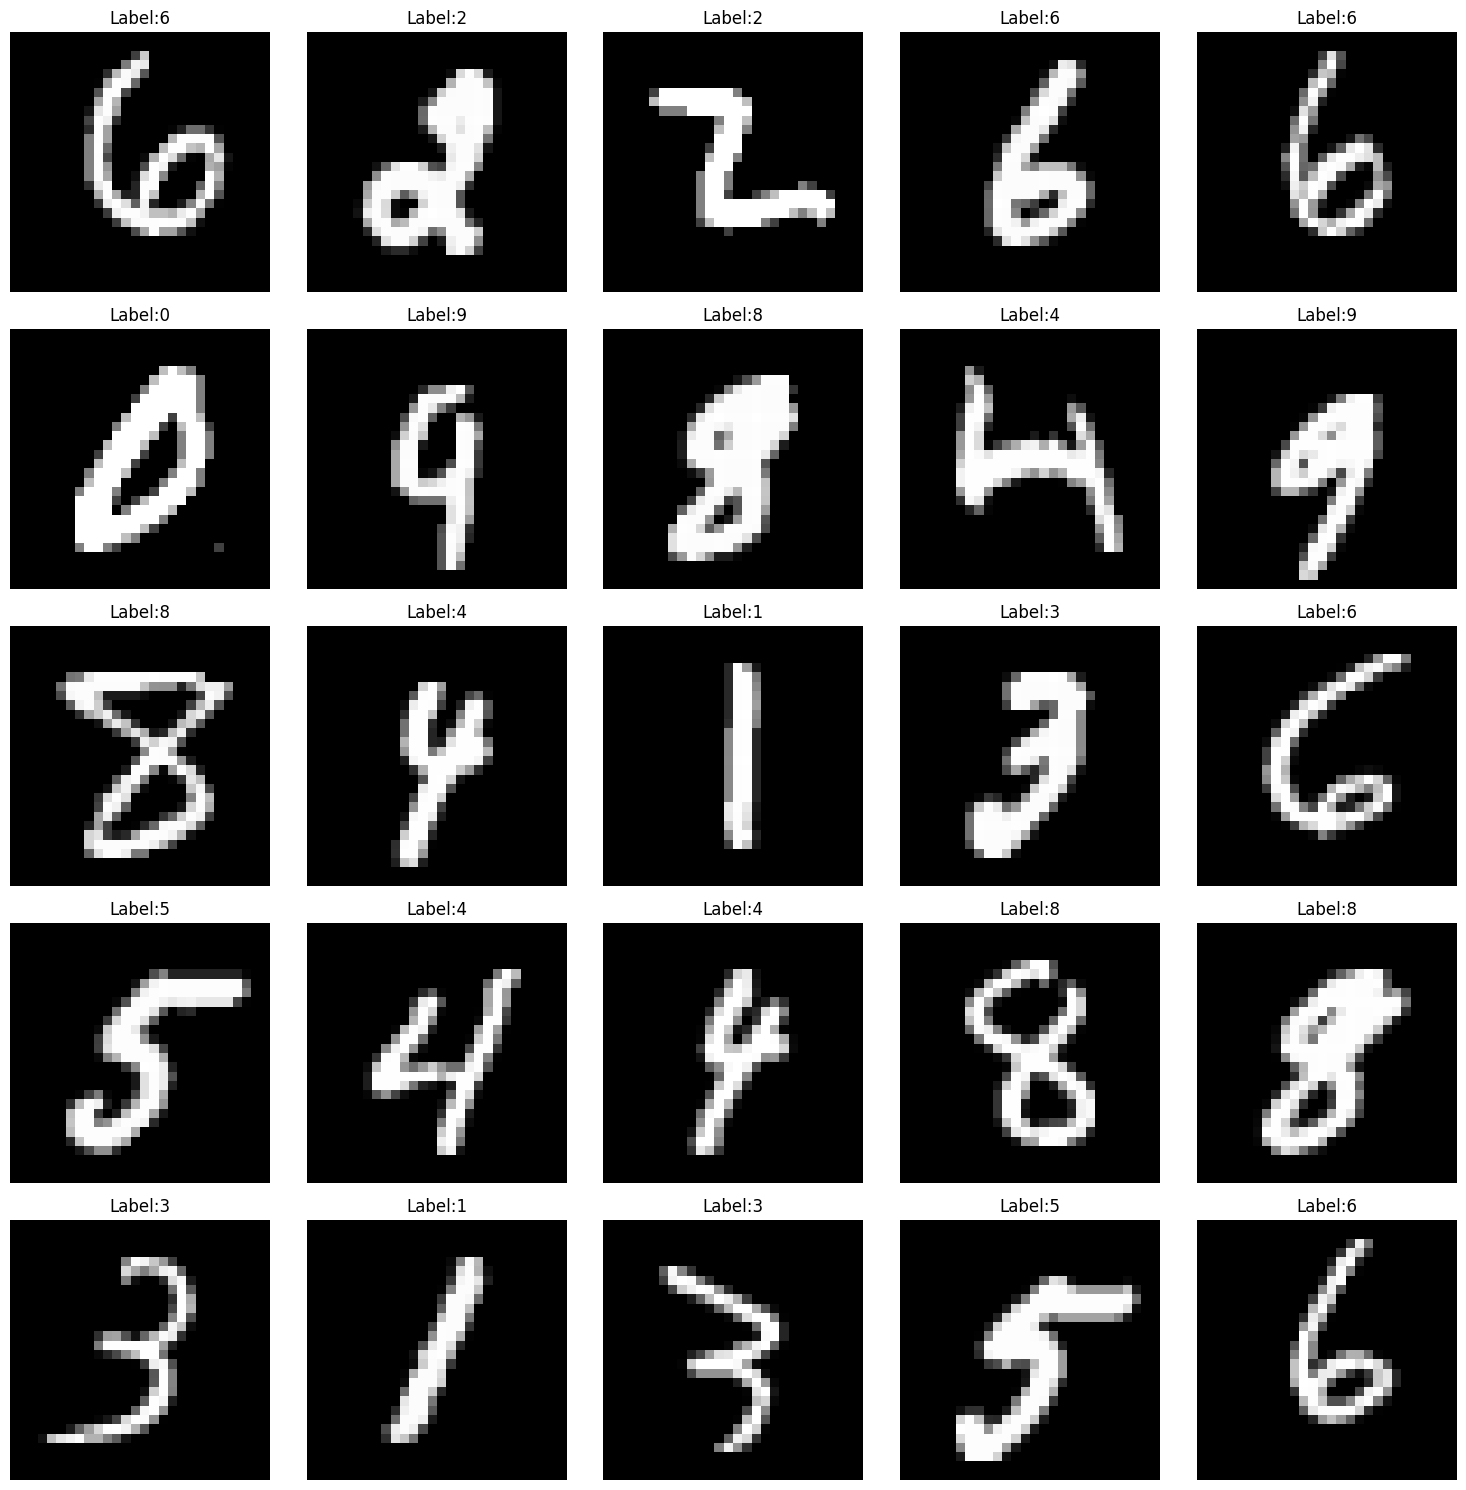

In [17]:
show_examples(x_4[24750:],y_4[24750:])

* combaine data

(42000, 1, 28, 28) (42000,)
(70000, 1, 28, 28) (70000,)
(70000, 1, 28, 28) (70000,)
result: (182000, 1, 28, 28) (182000,)


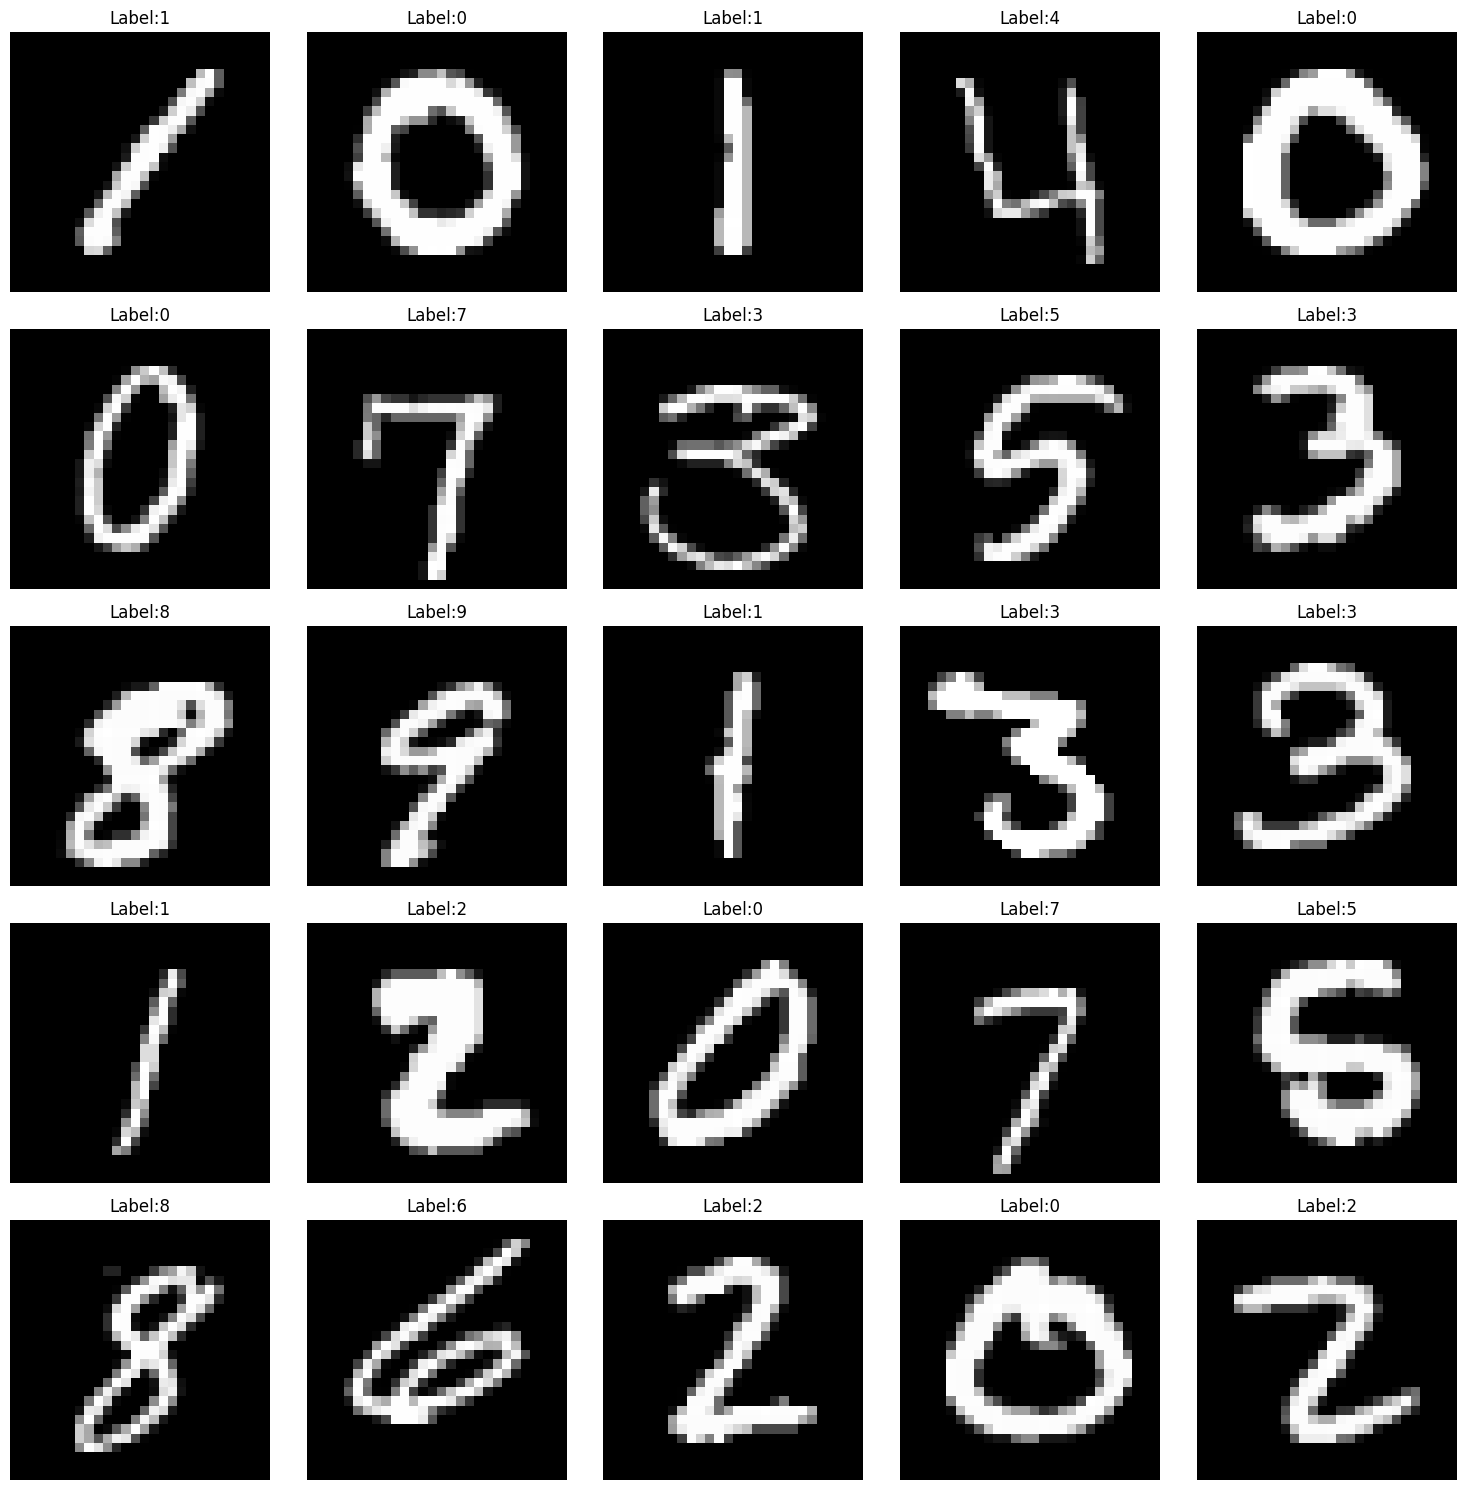

In [19]:
print(x_1.shape, y_1.shape)
# print(x_2.shape, y_2.shape) # Removed as x_2 and y_2 are not defined
print(x_3.shape, y_3.shape)
print(x_4.shape, y_4.shape)
X = np.concatenate((x_1, x_3, x_4)) # Removed x_2
y = np.concatenate((y_1, y_3, y_4)) # Removed y_2
print(f"result: {X.shape} {y.shape}")
show_examples(X,y)

* train test split

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(145600, 1, 28, 28)
(36400, 1, 28, 28)
(145600,)
(36400,)


# 2. Load data

* data augmentation

In [23]:
import torch
import math
from torch.utils.data import Dataset, TensorDataset
import kornia.geometry.transform as K

class CustomDataset(TensorDataset):
    def __init__(self, *tensor, augment=False):
        super().__init__(*tensor)
        self.augment = augment

    def __getitem__(self, idx):
        image, label = super().__getitem__(idx)
        if self.augment:
            angle = torch.tensor(np.random.uniform(-10, 10))
            image = self.rotate_tensor(image, angle)
        return image, label

    def rotate_tensor(self, tensor, angle):
        tensor = tensor.unsqueeze(0)
        rot_tensor = K.rotate(tensor, angle)
        return rot_tensor.squeeze(0)
    def translate_tensor(self, tensor, shiftX, shiftY):
        trans_tensor = torch.roll(tensor, (shiftX, shiftY), dims=(1, 2))
        return trans_tensor
    def scale_tensor(self, tensor, scale_factor):
        tensor = tensor.unsqueeze(0)
        scale_tensor = K.scale(tensor, torch.tensor(scale_factor))
        return scale_tensor.squeeze(0)

X_train /= 255.0
X_test /= 255.0
X_train_tensor = torch.tensor(X_train).float()
y_train_tensor = torch.tensor(y_train).long()
X_test_tensor = torch.tensor(X_test).float()
y_test_tensor = torch.tensor(y_test).long()
train_data = CustomDataset(X_train_tensor, y_train_tensor, augment=True)
test_data = CustomDataset(X_test_tensor, y_test_tensor)
print(f"{len(train_data)}")
print(f"{len(test_data)}")

145600
36400


In [22]:
!pip install kornia

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 50.3 MB/s eta 0:00:00


* data loader

numbers of batchs for train : 1138


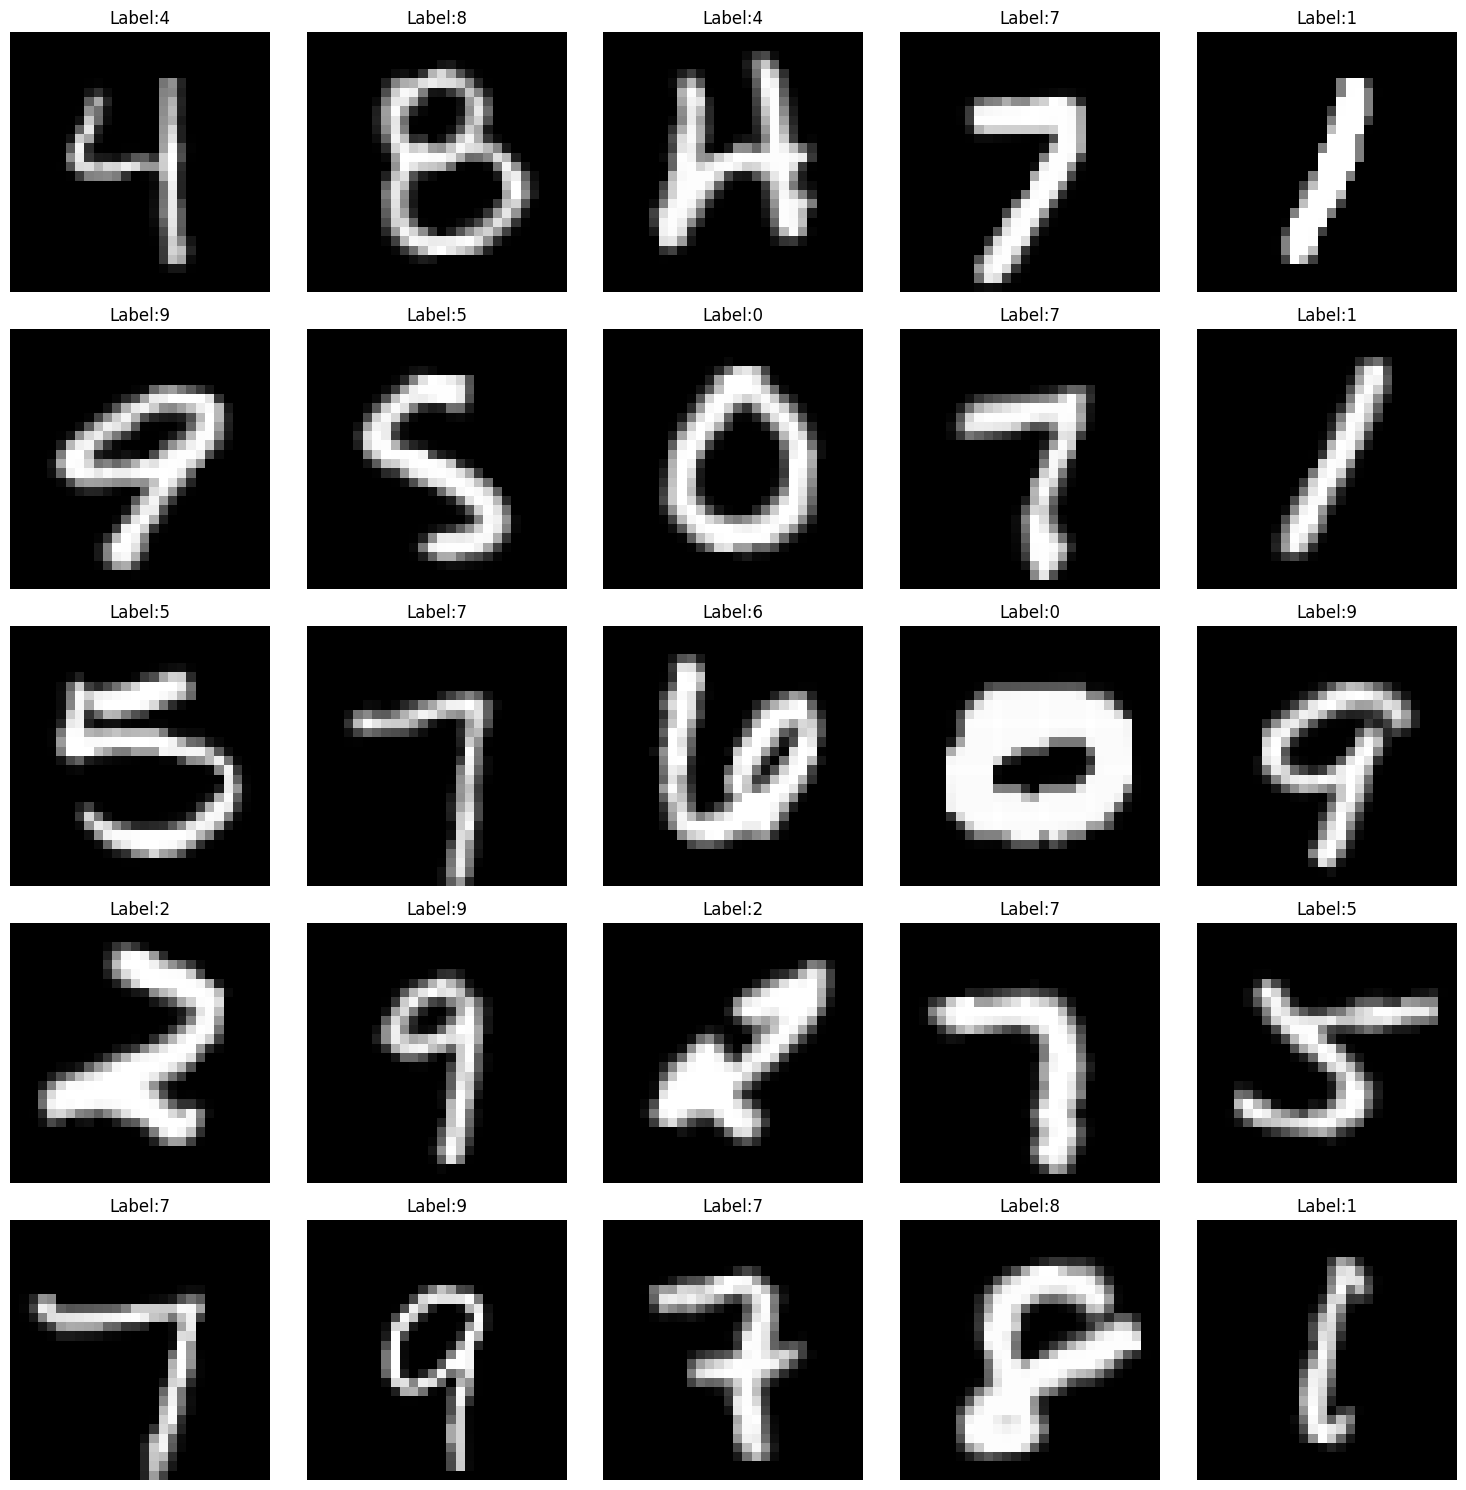

numbers of batchs for test : 285


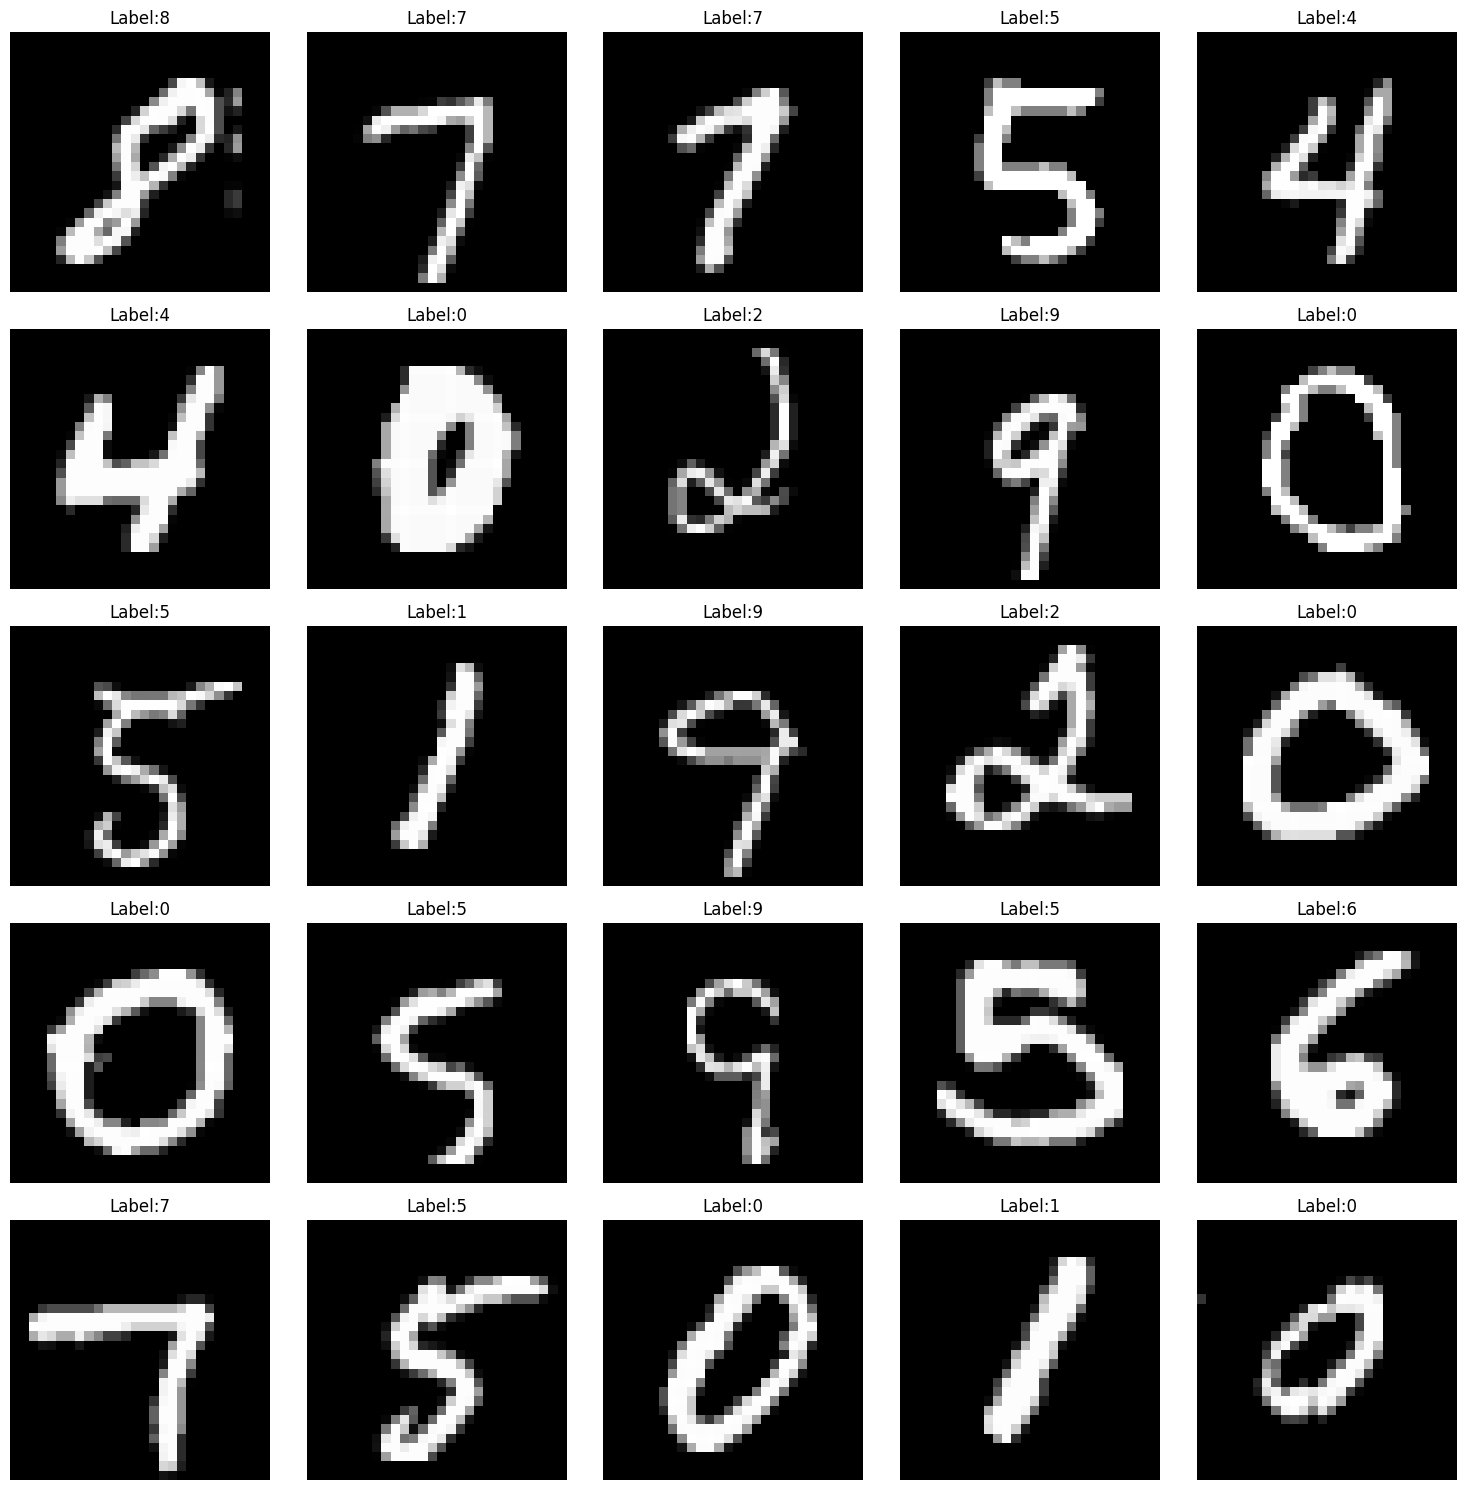

In [24]:
from torch.utils.data import DataLoader
batch_size = 128
train_data_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_data_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False)
print(f"numbers of batchs for train : {len(train_data_loader)}")
for image, label in train_data_loader:
    show_examples(image.cpu().numpy(), label.cpu().numpy())
    break
print(f"numbers of batchs for test : {len(test_data_loader)}")
for image, label in test_data_loader:
    show_examples(image.cpu().numpy(), label.cpu().numpy())
    break

# 3. Model Structure

In [25]:
import torch
import torch.nn as nn
class DigitClassifer(nn.Module):
    def __init__(self):
        super(DigitClassifer, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(1, 16, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.net = nn.Sequential(
            nn.Flatten(),
            nn.Linear(16 * 14 * 14, 128),
            nn.ReLU(),
            nn.Linear(128, 10)
        )
    def forward(self, x):
        feas = self.conv(x)
        return self.net(feas)

In [30]:
from torchinfo import summary
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"device : {device}")
model = DigitClassifer().to(device)
summary(model, input_size=(batch_size,1,28,28))

device : cpu


Layer (type:depth-idx)                   Output Shape              Param #
DigitClassifer                           [128, 10]                 --
├─Sequential: 1-1                        [128, 16, 14, 14]         --
│    └─Conv2d: 2-1                       [128, 16, 28, 28]         160
│    └─ReLU: 2-2                         [128, 16, 28, 28]         --
│    └─MaxPool2d: 2-3                    [128, 16, 14, 14]         --
├─Sequential: 1-2                        [128, 10]                 --
│    └─Flatten: 2-4                      [128, 3136]               --
│    └─Linear: 2-5                       [128, 128]                401,536
│    └─ReLU: 2-6                         [128, 128]                --
│    └─Linear: 2-7                       [128, 10]                 1,290
Total params: 402,986
Trainable params: 402,986
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 67.62
Input size (MB): 0.40
Forward/backward pass size (MB): 12.99
Params size (MB): 1.61
Estimated Total Siz

In [27]:
!pip install torchinfo

# 4.  Training

In [31]:
criterion = nn.CrossEntropyLoss()
from torch.optim import Adam
optimizer = Adam(model.parameters(), lr=0.001)

max_iterations = 1000

In [32]:
def Train(model, train_loader, val_loader, epochs=15):
    train_history = {'loss':[], 'accu':[]}
    val_history = {'loss':[], 'accu':[]}
    for epoch in range(epochs):
        model.train()
        train_loss = 0
        train_accu = 0
        total_train = 0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            pred = model(inputs)
            loss = criterion(pred, labels)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
            _, pred_label = torch.max(pred, axis=1)
            accu = (pred_label == labels).sum().item()
            train_accu += accu
            total_train += labels.size(0)
        train_accu = 100 * train_accu / total_train
        train_history['loss'].append(train_loss)
        train_history['accu'].append(train_accu)

        model.eval()
        val_loss = 0
        val_accu = 0
        total_val = 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                pred = model(inputs)
                loss = criterion(pred, labels)
                val_loss += loss.item()
                _, pred_label = torch.max(pred, axis=1)
                accu = (pred_label == labels).sum().item()
                val_accu += accu
                total_val += labels.size(0)
        val_accu = 100 * val_accu / total_val
        val_history['loss'].append(val_loss)
        val_history['accu'].append(val_accu)
        print(f"Epoch [{epoch+1}/{epochs}]: train_loss={train_loss:.4f}| train_accu={train_accu:.2f}| val_loss={val_loss:.4f}| val_accu={val_accu:.2f}")
    return {"train":train_history, "val":val_history}

In [33]:
history = Train(model, train_data_loader, test_data_loader, epochs=10)

Epoch [1/10]: train_loss=212.8701| train_accu=94.70| val_loss=18.9978| val_accu=97.98
Epoch [2/10]: train_loss=63.8234| train_accu=98.27| val_loss=13.8321| val_accu=98.57
Epoch [3/10]: train_loss=43.7440| train_accu=98.81| val_loss=11.6646| val_accu=98.66
Epoch [4/10]: train_loss=33.2339| train_accu=99.07| val_loss=8.8483| val_accu=99.11
Epoch [5/10]: train_loss=25.5670| train_accu=99.27| val_loss=6.7188| val_accu=99.32
Epoch [6/10]: train_loss=21.1140| train_accu=99.42| val_loss=6.8037| val_accu=99.30
Epoch [7/10]: train_loss=17.3830| train_accu=99.54| val_loss=5.0037| val_accu=99.52
Epoch [8/10]: train_loss=14.6011| train_accu=99.58| val_loss=5.0990| val_accu=99.45
Epoch [9/10]: train_loss=12.7788| train_accu=99.66| val_loss=4.0424| val_accu=99.63
Epoch [10/10]: train_loss=10.6962| train_accu=99.70| val_loss=3.5274| val_accu=99.65


In [34]:
def plot_history(history):
    train_history = history['train']
    val_history = history['val']
    plt.figure(figsize=(10,8))
    plt.plot(train_history['loss'])
    plt.plot(val_history['loss'])
    plt.title("Loss")
    plt.show()
    plt.figure(figsize=(10,8))
    plt.plot(train_history['accu'])
    plt.plot(val_history['accu'])
    plt.title("Accuracy")
    plt.show()

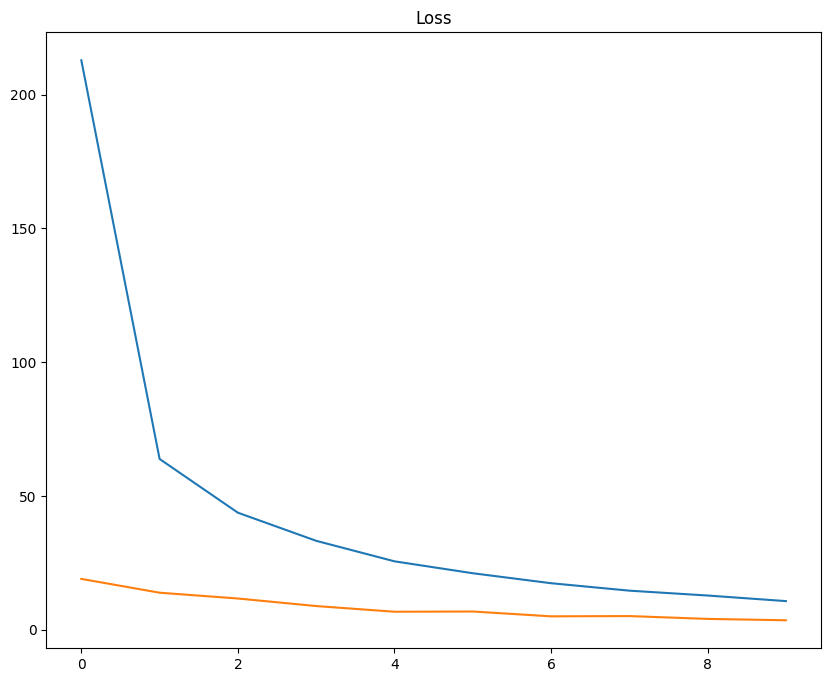

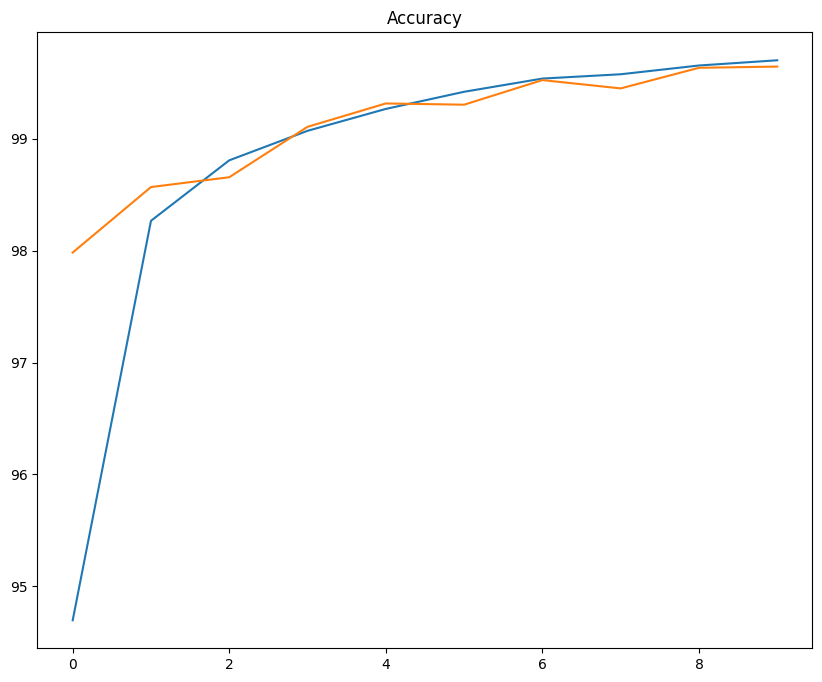

In [35]:
plot_history(history)

In [36]:
torch.save(model.state_dict(), 'model.pth')
print('Model saved.')

Model saved.


In [37]:
from torch.utils.data import RandomSampler
def test(model, test_data):
    random_25_sampler = RandomSampler(test_data, num_samples=25, replacement=False)
    random_25_loader = DataLoader(test_data, batch_size=25, shuffle=False, sampler=random_25_sampler)
    model.eval()
    with torch.no_grad():
        inputs, labels = next(iter(random_25_loader))
        inputs, labels = inputs.to(device), labels.to(device)
        pred = model(inputs)
        _, pred_labels = torch.max(pred, axis=1)

    inputs = inputs.cpu()
    labels = labels.cpu()
    pred_labels = pred_labels.cpu()
    plt.figure(figsize=(15,15))
    is_normalized = inputs.min() < 0 or inputs.max() > 1
    for i in range(25):
        plt.subplot(5,5,i+1)
        if is_normalized:
            denormalized_image = (inputs[i] * 0.5) + 0.5
        else:
            denormalized_image = inputs[i]
        plt.imshow(denormalized_image.squeeze(), cmap='gray')
        plt.title(f"label: {labels[i]} pred: {pred_labels[i]}")
        plt.axis('off')
    plt.show()

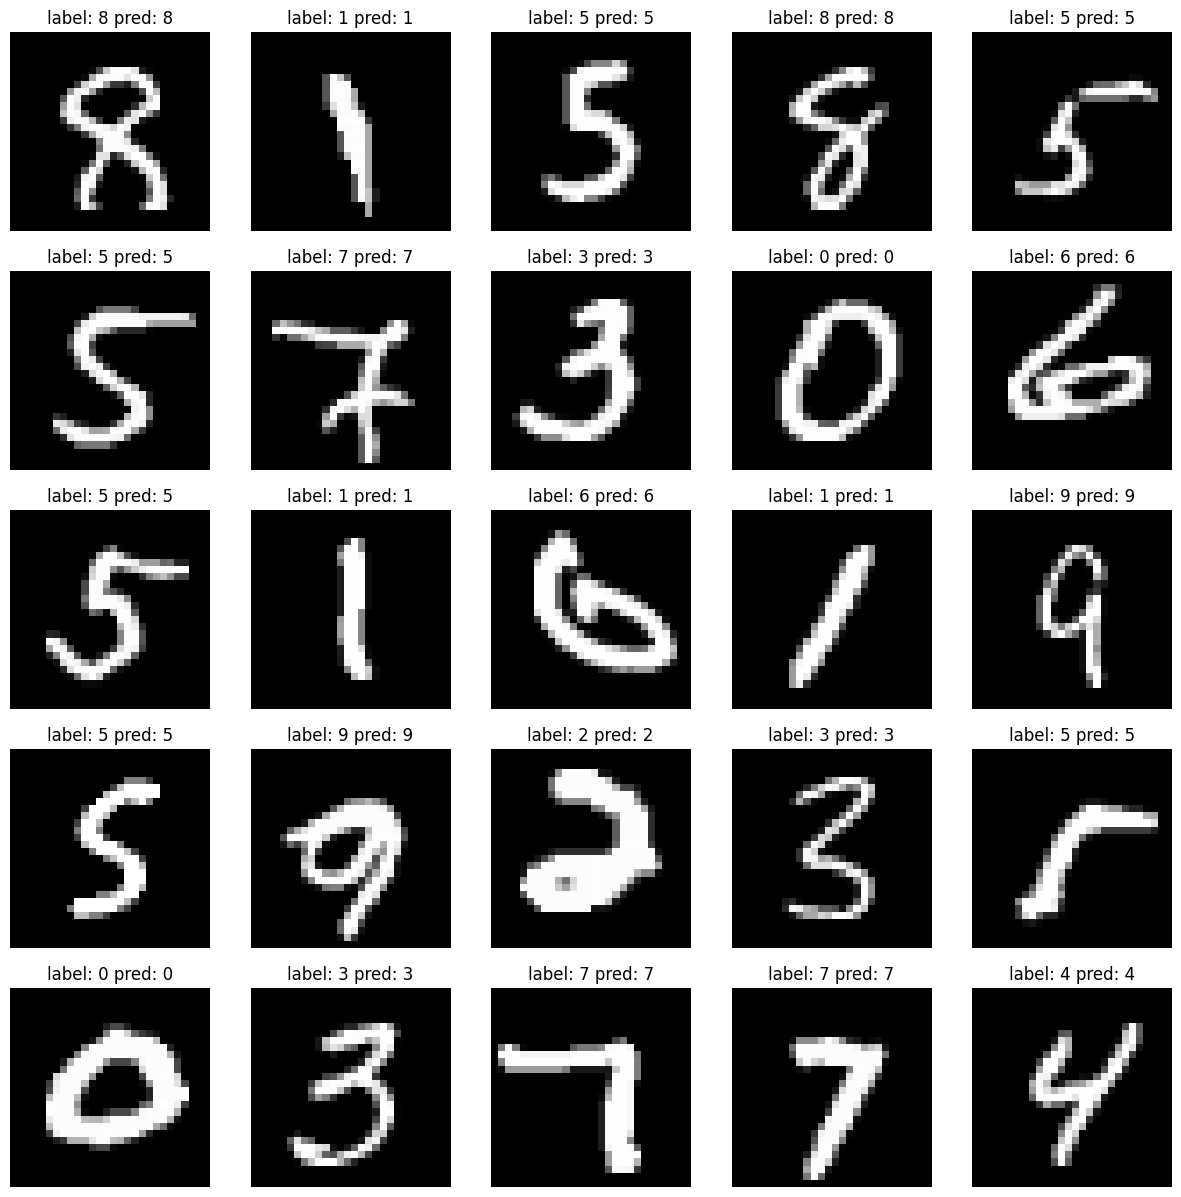

In [38]:
test(model, test_data)

In [39]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
def model_metrics(model, test_loader):
    all_pred = []
    all_label = []
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        pred = model(inputs)
        _, pred_labels = torch.max(pred, axis=1)
        all_pred.extend(pred_labels.cpu().numpy())
        all_label.extend(labels.cpu().numpy())
    all_pred = np.array(all_pred)
    all_label = np.array(all_label)
    matrix = confusion_matrix(all_pred, all_label)
    plt.figure(figsize=(15,15))
    sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title("Confusion Matrix")
    plt.show()

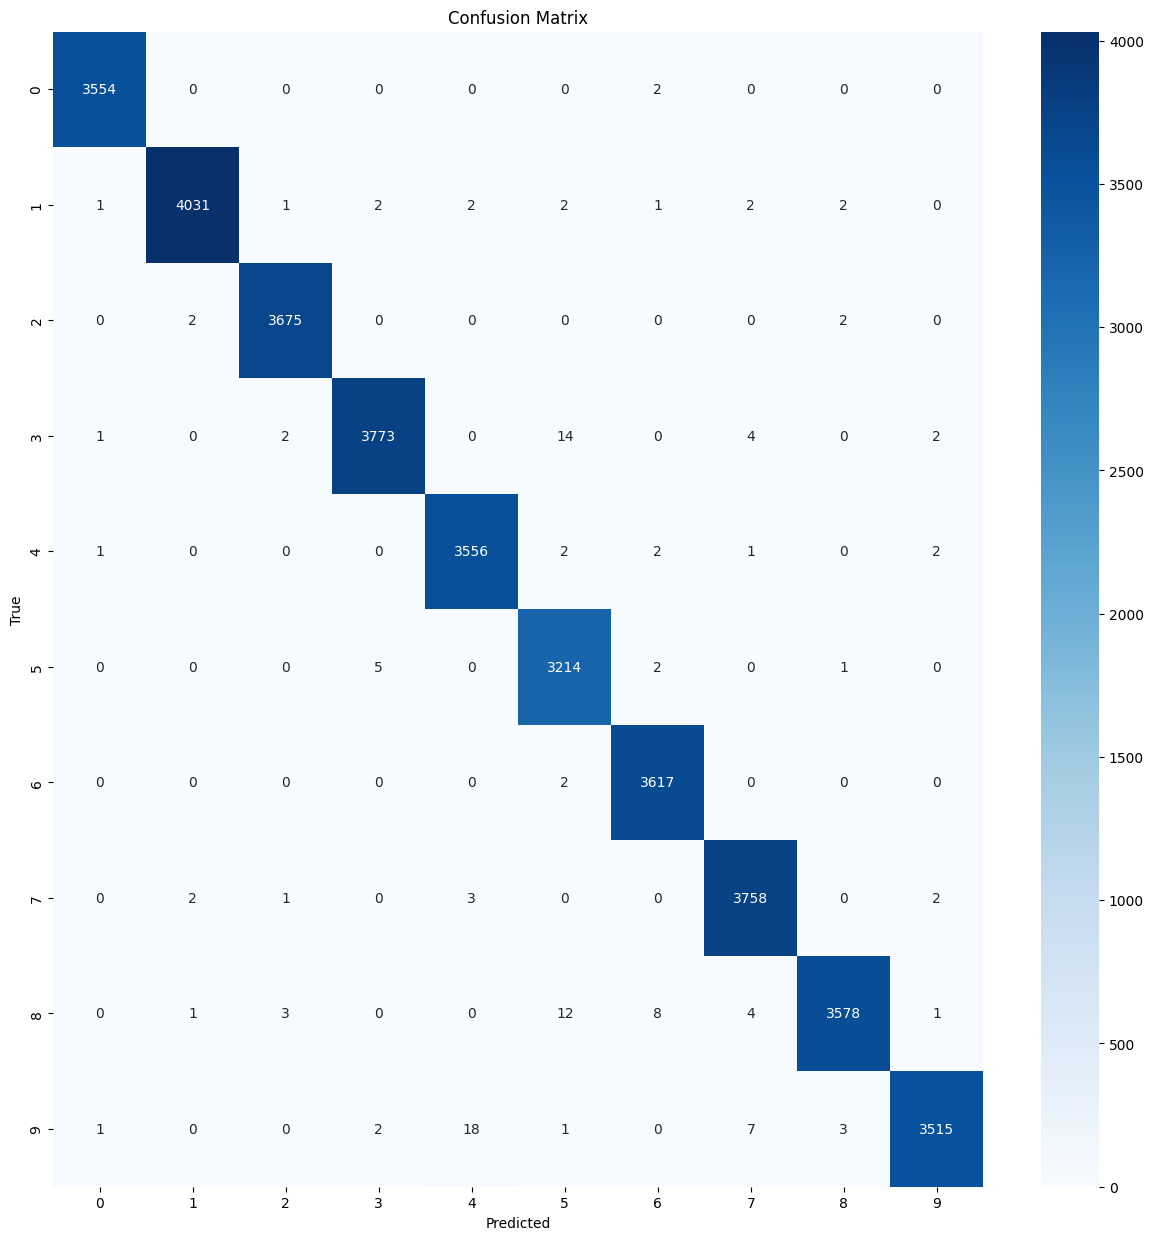

In [40]:
model_metrics(model, test_data_loader)